# City of Cupertino 
## Summary:
### Average Sale price in the city of Cupertino is about 1.5 M.
### Cupertinos like mid size house with 8 rooms, 3 bedrooms, 2 baths( NOT 2.5 baths)!!!
### Size of parking lot did not have a huge impact on  house sales.
    


In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
cupertino_data_to_load = "data/lm6_AllEvents_City_Cupertino_Property_data.csv"


# Read the Data
cupertino_data_df = pd.read_csv(cupertino_data_to_load)



In [2]:
cupertino_data_cleaned_df = cupertino_data_df[['SummaryYearbuilt','AddressOneLine','LotLotsize2','LocationLongitude',\
'LocationLatitude','UtilitiesHeatingtype','BuildingSizeGrosssize',\
'BuildingSizeLivingsize',\
'BuildingRoomsBathstotal','BuildingRoomsBeds','BuildingRoomsRoomsTotal','BuildingParkingPrkgSize',\
'SaleAmountSaleamt','AssessmentTaxTaxamt','SummaryProptype']]

cupertino_data_cleaned_df.fillna(0, inplace=True)
cupertino_data_cleaned_df.set_index('SummaryYearbuilt')

cupertino_data_cleaned_df = cupertino_data_cleaned_df[cupertino_data_cleaned_df['SummaryYearbuilt'] > 0]
cupertino_data_cleaned_df = cupertino_data_cleaned_df[cupertino_data_cleaned_df['SaleAmountSaleamt'] > 0]
cupertino_data_cleaned_df = cupertino_data_cleaned_df[cupertino_data_cleaned_df['AssessmentTaxTaxamt'] > 0]

cupertino_data_cleaned_df = cupertino_data_cleaned_df[cupertino_data_cleaned_df['SummaryProptype'] != 'VACANT LAND (NEC)']

cupertino_data_renamed_df  = cupertino_data_cleaned_df.rename(columns = {"SummaryYearbuilt": "Year Built", "SaleAmountSaleamt" : "Sale Amount"})




In [3]:
cupertino_data_renamed_df

,Year Built,AddressOneLine,LotLotsize2,LocationLongitude,LocationLatitude,UtilitiesHeatingtype,BuildingSizeGrosssize,BuildingSizeLivingsize,BuildingRoomsBathstotal,BuildingRoomsBeds,BuildingRoomsRoomsTotal,BuildingParkingPrkgSize,Sale Amount,AssessmentTaxTaxamt,SummaryProptype
20,1940,"16201 STEVENS CANYON RD, CUPERTINO, CA 95014",55543,-122.098941,37.269453,0,676,676,1.0,1,3,440,870000,11397.22,SFR
33,1948,"16500 STEVENS CANYON RD, CUPERTINO, CA 95014",30000,-122.104006,37.271970,0,1185,1185,1.0,2,4,250,132500,9429.78,SFR
36,1940,"16790 STEVENS CANYON RD, CUPERTINO, CA 95014",24255,-122.107349,37.275199,0,1096,1096,1.0,3,6,0,750000,9881.56,SFR
38,1900,"16890 STEVENS CANYON RD, CUPERTINO, CA 95014",28800,-122.110668,37.277078,0,0,0,0.0,0,0,0,385000,1811.24,FOREST
39,1900,"16890 STEVENS CANYON RD, CUPERTINO, CA 95014",28800,-122.110668,37.277078,0,0,0,0.0,0,0,0,385000,1811.24,FOREST
53,2001,"17310 STEVENS CANYON RD, CUPERTINO, CA 95014",10066,-122.117838,37.280449,0,2500,2500,2.0,4,6,560,158000,2391.42,SFR
54,1940,"17320 STEVENS CANYON RD, CUPERTINO, CA 95014",88426,-122.117910,37.280514,0,786,786,1.0,3,5,0,350000,4615.50,SFR
64,1983,"13360 MONTEBELLO RD, CUPERTINO, CA 95014",44348,-122.088813,37.287163,0,3196,3196,3.0,4,11,0,2789000,4775.48,SFR
65,1968,"14151 MONTEBELLO RD, CUPERTINO, CA 95014",482644,-122.089488,37.287394,0,2498,2498,2.0,2,7,0,1600000,21225.24,SFR
68,1992,"14025 MONTEBELLO RD, CUPERTINO, CA 95014",80209,-122.090046,37.287517,0,4000,4000,3.0,4,11,985,1925000,26900.00,SFR


In [4]:
x_axis = np.sort(cupertino_data_renamed_df['Year Built'].unique())
x_axis

array([1900, 1938, 1940, 1942, 1945, 1948, 1950, 1951, 1953, 1954, 1955,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2001, 2002,
       2003, 2005, 2006, 2007, 2008, 2009, 2010, 2012, 2013, 2014, 2015,
       2016, 2017, 2018], dtype=int64)

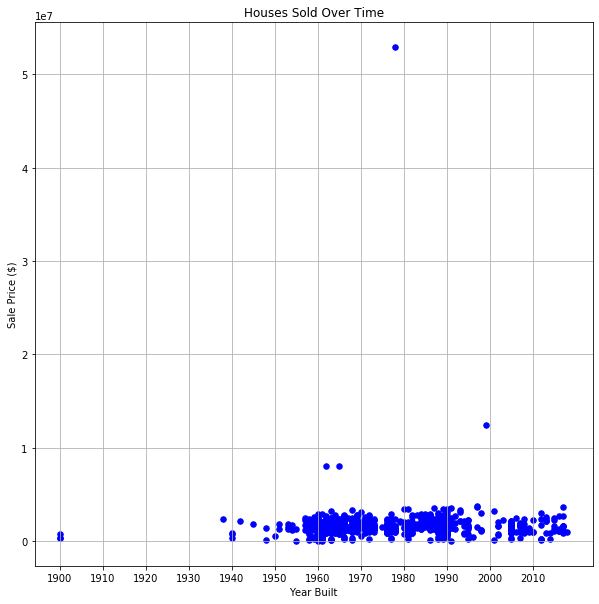

In [5]:
data = cupertino_data_renamed_df[['Year Built','Sale Amount']]

plt.figure(figsize=(10,10))
plt.scatter(data['Year Built'], data['Sale Amount'],marker="o",c="b", s = 30)

plt.xticks(np.arange(min(data['Year Built']),max(data['Year Built']) + 1, 10))

# Create a title, x label, and y label for our chart
plt.title("Houses Sold Over Time")
plt.xlabel("Year Built")
plt.ylabel("Sale Price ($)")

# set grid lines
plt.grid()

# Save the Figure
# plt.savefig("Images/Cupertino- Avg Sale Price")

plt.show()

## Notice how the outlier is skewing the graph making the plot noisy in the bottom
### So the next step was to drop the outliers

In [6]:
data = data[(data['Sale Amount'] < 5000000) & (data['Year Built'] > 1940)]
data.head()

,Year Built,Sale Amount
33,1948,132500
53,2001,158000
64,1983,2789000
65,1968,1600000
68,1992,1925000


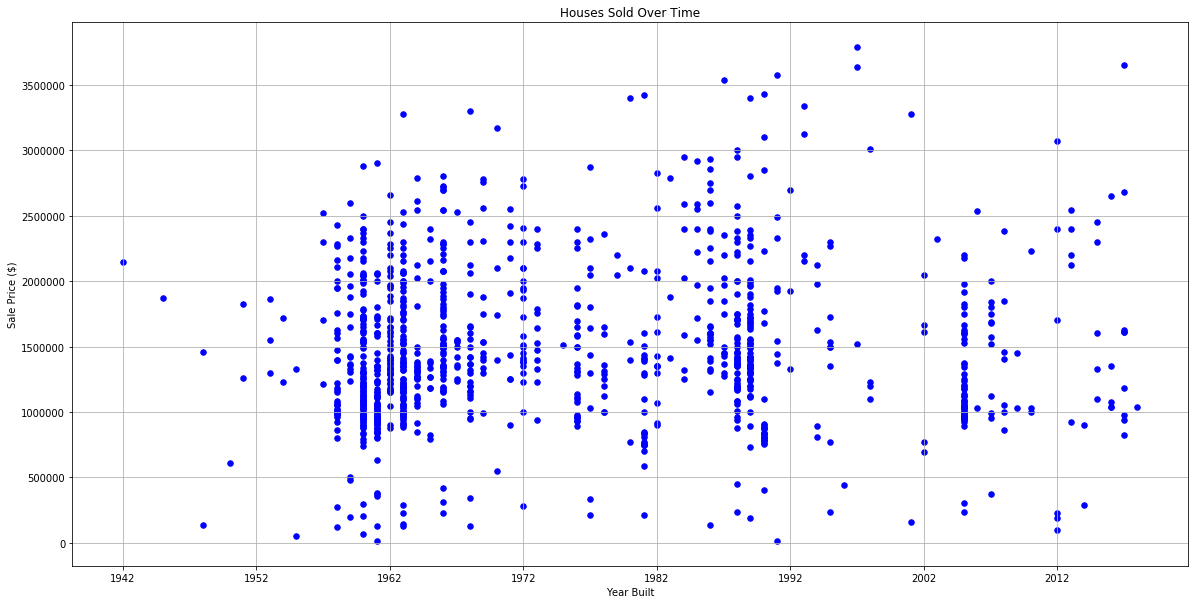

In [7]:

plt.figure(figsize=(20,10))
plt.scatter(data['Year Built'], data['Sale Amount'],marker="o",c="b", s = 30)

plt.xticks(np.arange(min(data['Year Built']),max(data['Year Built']) + 1, 10))

# Create a title, x label, and y label for our chart
plt.title("Houses Sold Over Time")
plt.xlabel("Year Built")
plt.ylabel("Sale Price ($)")

# set grid lines
plt.grid()



In [8]:
# get the mean value and plot the scatter by year

mean_cupertino_data = data.groupby(["Year Built"]).mean()

# Convert to DataFrame
mean_cupertino_df = mean_cupertino_data.reset_index()

# Preview DataFrame
mean_cupertino_df.head()

,Year Built,Sale Amount
0,1942,2148000.0
1,1945,1870000.0
2,1948,793750.0
3,1950,610000.0
4,1951,1542500.0


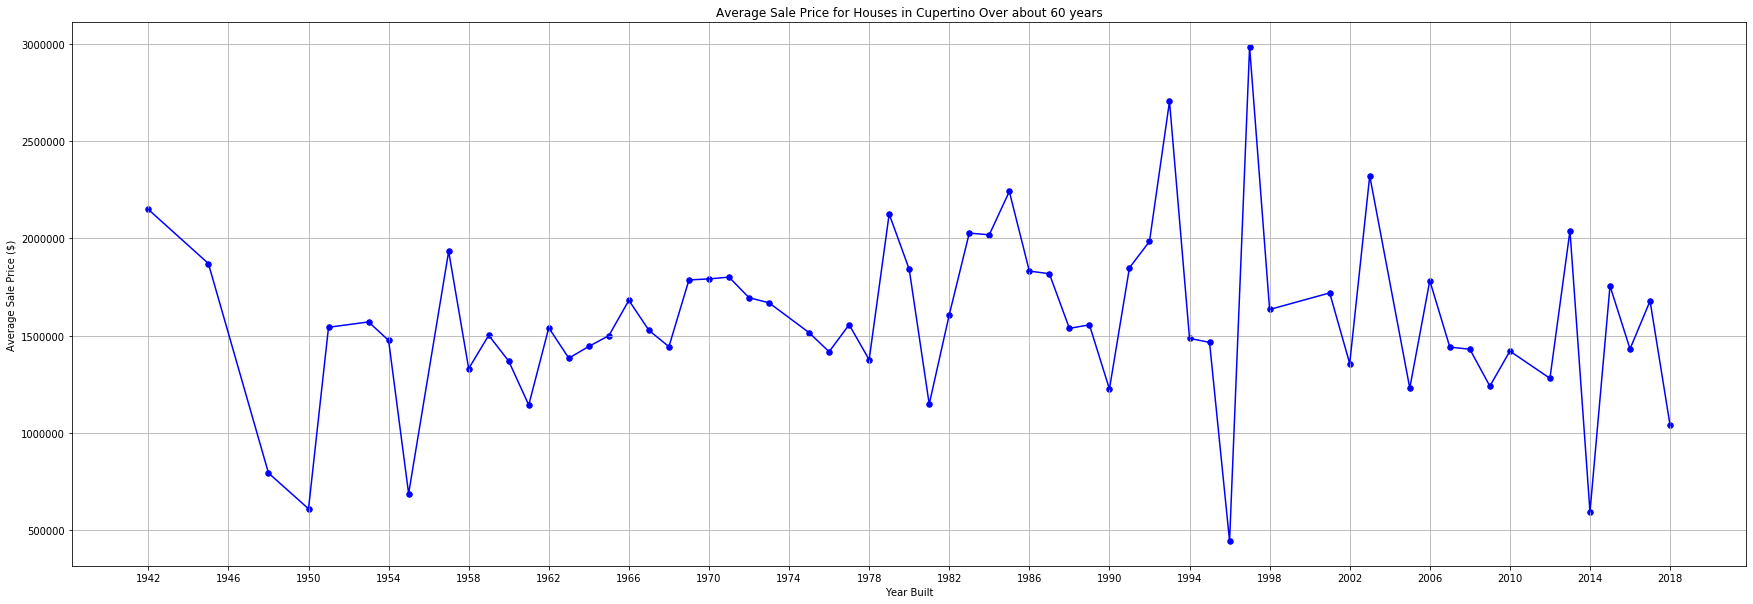

In [9]:
data = mean_cupertino_df

plt.figure(figsize=(30,10))
plt.scatter(data['Year Built'], data['Sale Amount'],marker="o",c="b", s = 30)
plt.errorbar(data['Year Built'], data['Sale Amount'], color="b")

plt.xticks(np.arange(min(data['Year Built']),max(data['Year Built']) + 1, 4))

# Create a title, x label, and y label for our chart
plt.title("Average Sale Price for Houses in Cupertino Over about 60 years")
plt.xlabel("Year Built")
plt.ylabel("Average Sale Price ($)")

# set grid lines
plt.grid()

# Save the Figure
plt.savefig("Images/Cupertino_AverageSalePrice")

plt.show()

In [10]:
# fig, ax = plt.subplots()


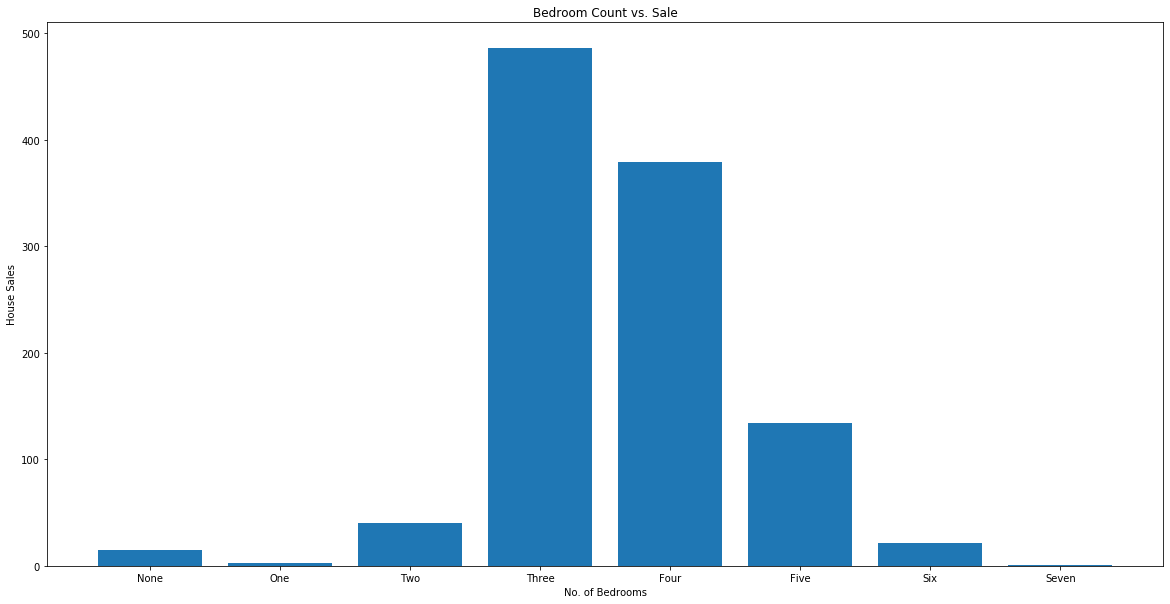

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(20,10))

cupertino_data_renamed_df['Count Value'] = 1

x_axis = cupertino_data_renamed_df['BuildingRoomsBeds'].unique()

bars_in_bedrooms = ["None","One", "Two", "Three", "Four", "Five","Six","Seven"]

data = cupertino_data_renamed_df.groupby(['BuildingRoomsBeds'])['Count Value'].count().reset_index()
plt.bar(bars_in_bedrooms, data['Count Value'], align="center")

plt.title("Bedroom Count vs. Sale")
plt.xlabel("No. of Bedrooms")
plt.ylabel("House Sales")

plt.show()
     
plt.tight_layout()





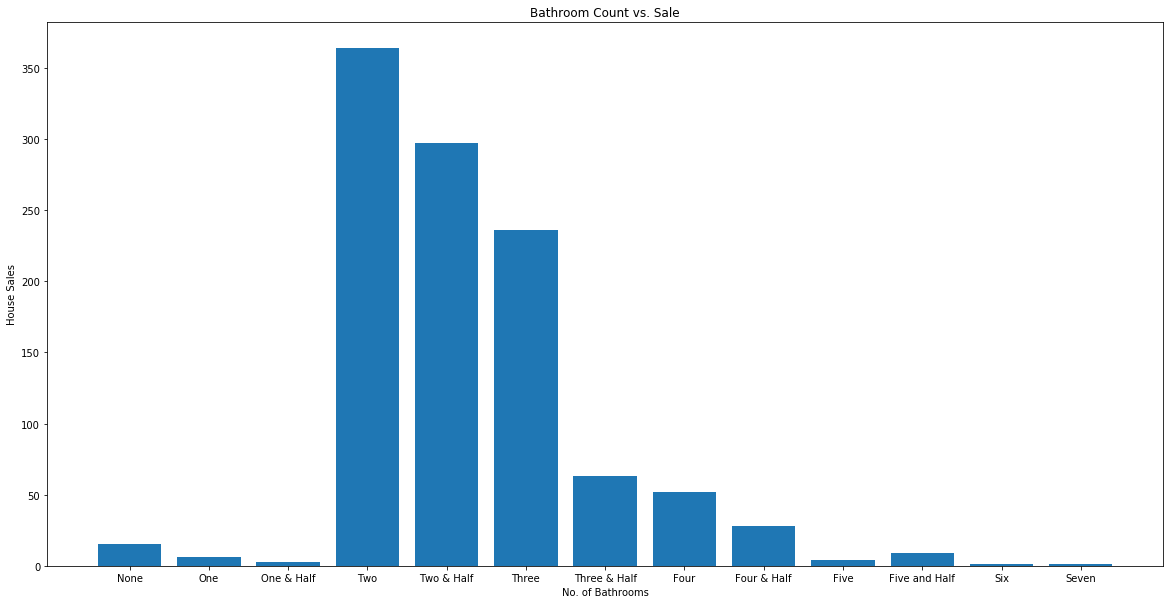

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize=(20,10))

cupertino_data_renamed_df['Count Value'] = 1

x_axis = cupertino_data_renamed_df['BuildingRoomsBathstotal'].unique()
x_axis = [float(x) for x in x_axis.tolist()]
np.sort(x_axis)

bars_in_bathrooms = ["None","One", "One & Half", "Two", "Two & Half", "Three", "Three & Half","Four", "Four & Half",\
                     "Five","Five and Half","Six","Seven"]

data = cupertino_data_renamed_df.groupby(['BuildingRoomsBathstotal'])['Count Value'].count().reset_index()

# data
plt.bar(bars_in_bathrooms, data['Count Value'], align="center")

plt.title("Bathroom Count vs. Sale")
plt.xlabel("No. of Bathrooms")
plt.ylabel("House Sales")

plt.show()
     
plt.tight_layout()



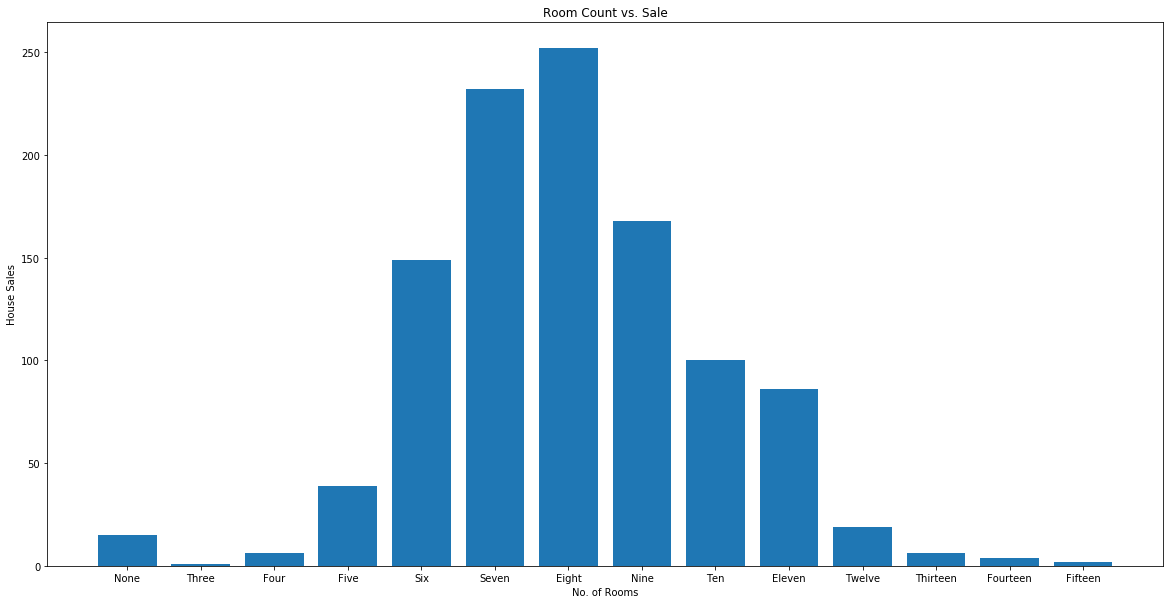

<Figure size 432x288 with 0 Axes>

In [53]:
plt.figure(figsize=(20,10))

cupertino_data_renamed_df['Count Value'] = 1

x_axis = cupertino_data_renamed_df['BuildingRoomsRoomsTotal'].unique()
np.sort(x_axis)

bars_in_rooms = ["None","Three", "Four", "Five", "Six", "Seven", "Eight","Nine", "Ten",\
                     "Eleven","Twelve","Thirteen","Fourteen","Fifteen"]

data = cupertino_data_renamed_df.groupby(['BuildingRoomsRoomsTotal'])['Count Value'].count().reset_index()

# data
plt.bar(bars_in_rooms, data['Count Value'], align="center")

plt.title("Room Count vs. Sale")
plt.xlabel("No. of Rooms")
plt.ylabel("House Sales")

plt.show()
     
plt.tight_layout()

In [12]:
# cupertino_data_renamed_df['Count Value'] = 1

# data_groupby_utilities = cupertino_data_renamed_df.groupby(['BuildingRoomsBeds', 'BuildingRoomsBathstotal'])
# data_groupby_utilities.head()

# # data_groupby_utilities["BuildingRoomsBeds"].map("${:.0f}".format)
# data_by_utilities_df = data_groupby_utilities['Count Value'].count().reset_index()


In [57]:
# data_groupby_utilities['Count Value'].count().plot(kind='bar')
